<a href="https://www.kaggle.com/code/vesnalukic/eda-arrhythmia-classification?scriptVersionId=117440624" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heartbeat/ptbdb_abnormal.csv
/kaggle/input/heartbeat/ptbdb_normal.csv
/kaggle/input/heartbeat/mitbih_test.csv
/kaggle/input/heartbeat/mitbih_train.csv


In [2]:
# Import packages

import matplotlib.pyplot as plt

This attached dataset containss electrocardiogram (ECG) recordings. They are the PTB Diagnostic ECG Database the MIT-BIH Arrhythmia Dataset. 

The aim of this kernel is to perform an EDA of the MIT-BIH Arrhythmia Dataset.

First, we read in the data and look at the shape, as well as the top few rows and the type

In [3]:
mitbih_test=pd.read_csv('/kaggle/input/heartbeat/mitbih_test.csv',header=None)
mitbih_train=pd.read_csv('/kaggle/input/heartbeat/mitbih_train.csv',header=None)
print(mitbih_test.shape)
print(mitbih_train.shape)
print(mitbih_train.head())
type(mitbih_train)
print(np.sum(np.min(mitbih_train.iloc[:,0:187])))
print(np.sum(np.max(mitbih_train.iloc[:,0:187])))
print(np.sum(np.min(mitbih_test.iloc[:,0:187])))
print(np.sum(np.max(mitbih_test.iloc[:,0:187])))

(21892, 188)
(87554, 188)
        0         1         2         3         4         5         6    \
0  0.977941  0.926471  0.681373  0.245098  0.154412  0.191176  0.151961   
1  0.960114  0.863248  0.461538  0.196581  0.094017  0.125356  0.099715   
2  1.000000  0.659459  0.186486  0.070270  0.070270  0.059459  0.056757   
3  0.925414  0.665746  0.541436  0.276243  0.196133  0.077348  0.071823   
4  0.967136  1.000000  0.830986  0.586854  0.356808  0.248826  0.145540   

        7         8         9    ...  178  179  180  181  182  183  184  185  \
0  0.085784  0.058824  0.049020  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.088319  0.074074  0.082621  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.043243  0.054054  0.045946  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.060773  0.066298  0.058011  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.089202  0.117371  0.150235  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   186  187  
0  0.0  0.0  
1  0.0  0.0  


The first 187 columns of the data contain the signal, the final column contains the class (numbered from 0 to 4 according to the arrythmia type). The data also appears to be normalised since the minimum value is 0 and the maximum value is 1 (when summed over the columns the value is 187)

In [4]:
mitbih_train_0=mitbih_train[mitbih_train.iloc[:,187]==0.0]
mitbih_train_1=mitbih_train[mitbih_train.iloc[:,187]==1.0]
mitbih_train_2=mitbih_train[mitbih_train.iloc[:,187]==2.0]
mitbih_train_3=mitbih_train[mitbih_train.iloc[:,187]==3.0]
mitbih_train_4=mitbih_train[mitbih_train.iloc[:,187]==4.0]

Plotting the histogram across each class, to see how many samples are in each

(array([72471.,     0.,  2223.,     0.,     0.,  5788.,     0.,   641.,
            0.,  6431.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

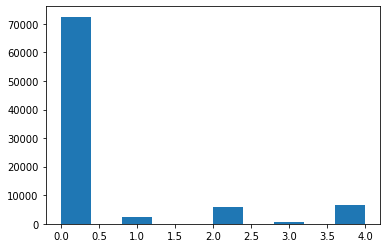

In [5]:
plt.hist(mitbih_train.iloc[:,187])

The largest number of samples occurred for the 'N' (normal type, class 0, 72471 samples), smaller numbers were observed in the other sub-types. Therefore, we should upsample the samples in the under-represented classes to have the same number as the 'N' class. 

Plotting a sample of signals from each class in order to see if there is a visual pattern that is common to each class

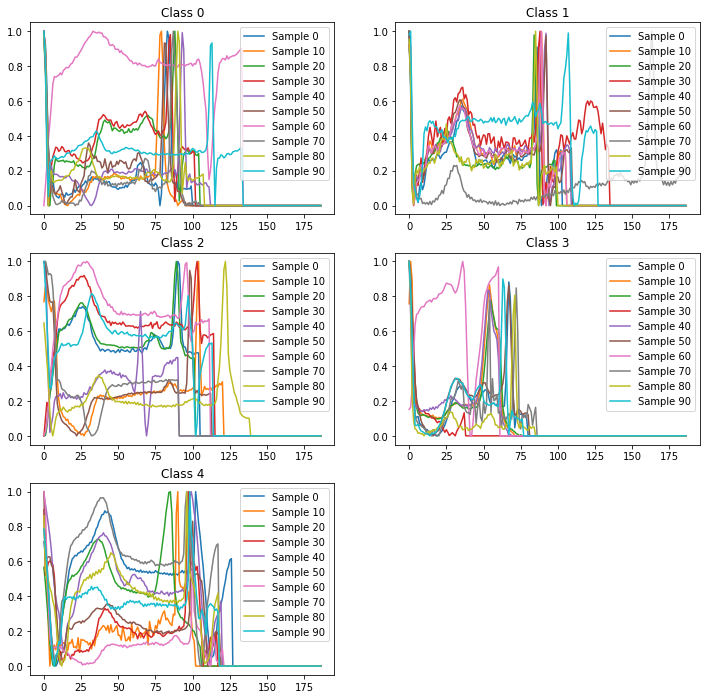

In [6]:
plt.figure(figsize=(12, 12))

for i in range(0,100,10):
    plt.subplot(321)
    plt.title('Class 0')
    plt.plot(np.linspace(0,186,187),mitbih_train_0.iloc[i,0:187],label='Sample '+str(i))
    plt.legend()
    plt.subplot(322)
    plt.title('Class 1')
    plt.plot(np.linspace(0,186,187),mitbih_train_1.iloc[i,0:187],label='Sample '+str(i))
    plt.legend()
    plt.subplot(323)
    plt.title('Class 2')
    plt.plot(np.linspace(0,186,187),mitbih_train_2.iloc[i,0:187],label='Sample '+str(i))
    plt.legend()
    plt.subplot(324)
    plt.title('Class 3')
    plt.plot(np.linspace(0,186,187),mitbih_train_3.iloc[i,0:187],label='Sample '+str(i))
    plt.legend()
    plt.subplot(325)
    plt.title('Class 4')
    plt.plot(np.linspace(0,186,187),mitbih_train_4.iloc[i,0:187],label='Sample '+str(i))
    plt.legend()

Some of the signals in each class appear to follow similar patterns, but there are also outliers. Next, we should plot the mean of the signals across each class, to see what a typical representative signal looks like. 

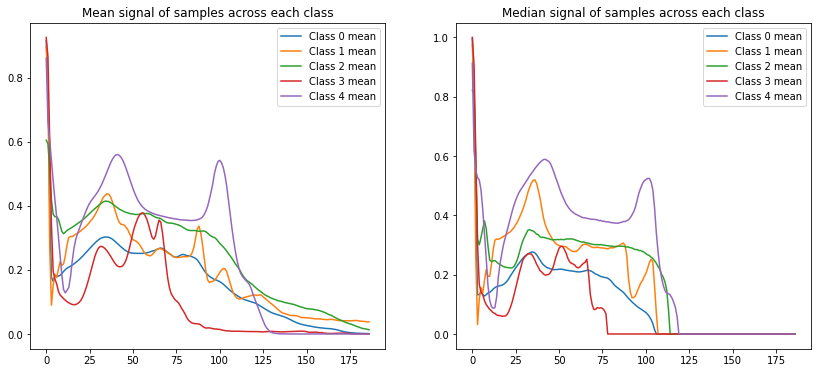

In [7]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
plt.title('Mean signal of samples across each class')
plt.plot(np.linspace(0,186,187),np.mean(mitbih_train_0.iloc[:,0:187]),label='Class 0 mean')
plt.plot(np.linspace(0,186,187),np.mean(mitbih_train_1.iloc[:,0:187]),label='Class 1 mean')
plt.plot(np.linspace(0,186,187),np.mean(mitbih_train_2.iloc[:,0:187]),label='Class 2 mean')
plt.plot(np.linspace(0,186,187),np.mean(mitbih_train_3.iloc[:,0:187]),label='Class 3 mean')
plt.plot(np.linspace(0,186,187),np.mean(mitbih_train_4.iloc[:,0:187]),label='Class 4 mean')
plt.legend()
plt.subplot(122)
plt.title('Median signal of samples across each class')
plt.plot(np.linspace(0,186,187),np.median(mitbih_train_0.iloc[:,0:187],axis=0),label='Class 0 mean')
plt.plot(np.linspace(0,186,187),np.median(mitbih_train_1.iloc[:,0:187],axis=0),label='Class 1 mean')
plt.plot(np.linspace(0,186,187),np.median(mitbih_train_2.iloc[:,0:187],axis=0),label='Class 2 mean')
plt.plot(np.linspace(0,186,187),np.median(mitbih_train_3.iloc[:,0:187],axis=0),label='Class 3 mean')
plt.plot(np.linspace(0,186,187),np.median(mitbih_train_4.iloc[:,0:187],axis=0),label='Class 4 mean')
plt.legend()
plt.savefig('Mean_median_samples_across_class.png')

The fact that there are some general patterns within each class is demonstrated in the appearance of the signal mean within each class. It is interesting to note that some classes have visibly more peaks (e.g. class 1,3 and 4) whereas the other two classes are relatively flat. They could be flat due to more variability between the signals, so that more signals have peaks and troughs that occur at different time points, hence wash out

We also plot the histograms to see the relative mean and standard deviation of the signals in each class. If the means are significantly different between the classes, it should be easier for a ML algorithm to classify them. If the standard deviation is small for the signals within the classes, there is less variability, therefore also easier to classify. However if it is large, then the larger variability could mean that some signals may get classified as being in a different class

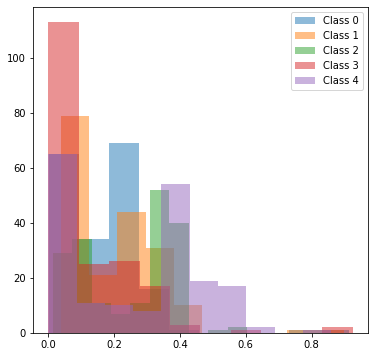

In [8]:
plt.figure(figsize=(6, 6))
alpha_val=0.5
plt.hist(np.mean(mitbih_train_0.iloc[:,0:187]),alpha=alpha_val,label='Class 0')
plt.hist(np.mean(mitbih_train_1.iloc[:,0:187]),alpha=alpha_val,label='Class 1')
plt.hist(np.mean(mitbih_train_2.iloc[:,0:187]),alpha=alpha_val,label='Class 2')
plt.hist(np.mean(mitbih_train_3.iloc[:,0:187]),alpha=alpha_val,label='Class 3')
plt.hist(np.mean(mitbih_train_4.iloc[:,0:187]),alpha=alpha_val,label='Class 4')
plt.legend()
plt.savefig('histogram_mean_5_classes.png')

Class 3 has the lowest mean of mean signal, whereas class 4 has the highest mean

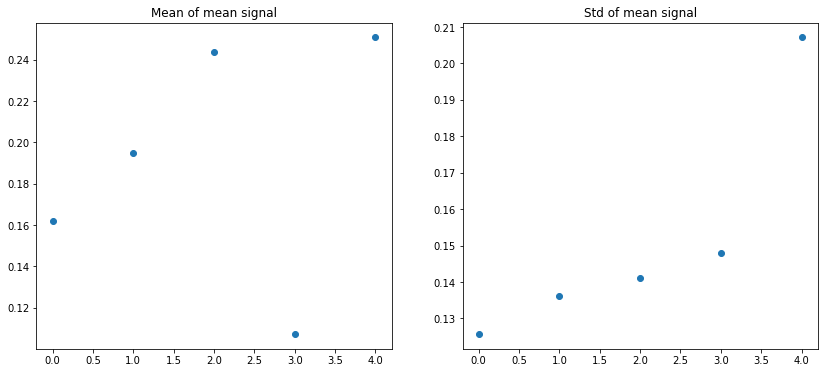

In [9]:
plt.rcParams["figure.figsize"] = (14,6)
plt.subplot(121)
plt.title('Mean of mean signal')
plt.scatter([0,1,2,3,4],[np.mean(np.mean(mitbih_train_0.iloc[:,0:187])),
                     np.mean(np.mean(mitbih_train_1.iloc[:,0:187])),
                     np.mean(np.mean(mitbih_train_2.iloc[:,0:187])),
                     np.mean(np.mean(mitbih_train_3.iloc[:,0:187])),
                     np.mean(np.mean(mitbih_train_4.iloc[:,0:187]))])
plt.subplot(122)
plt.title('Std of mean signal')
plt.scatter([0,1,2,3,4],[np.std(np.mean(mitbih_train_0.iloc[:,0:187])),
                     np.std(np.mean(mitbih_train_1.iloc[:,0:187])),
                     np.std(np.mean(mitbih_train_2.iloc[:,0:187])),
                     np.std(np.mean(mitbih_train_3.iloc[:,0:187])),
                     np.std(np.mean(mitbih_train_4.iloc[:,0:187]))])
plt.savefig('Means_std_signals.png')

The means of the mean signal are quite similar for classes 2 and 4, whereas they are quite different between the other 3 classes. Class 0 and 4 have the lowest and highest standard deviation respectively. Therefore class 0 should be the easiest to classify given that it has a relatively distinct mean and lowest standard deviation. Class 4 may be the most difficult since the mean is close to that of class 2, and the standard deviation is the highest.

It is also instructive to look at the shape of the mean signals: perhaps the ones with more distinctive features will be easier to classify.

Perform some sample correlations to see how some samples in the test set correlate with the mean and median of each class. For example, the first sample in the test set should be in class 0.

In [10]:
print('Correlation coefficient for each class, from using mean of each class:')
print(np.corrcoef(mitbih_test.iloc[0,0:187],np.mean(mitbih_train_0.iloc[:,0:187]))[1,0])
print(np.corrcoef(mitbih_test.iloc[0,0:187],np.mean(mitbih_train_1.iloc[:,0:187]))[1,0])
print(np.corrcoef(mitbih_test.iloc[0,0:187],np.mean(mitbih_train_2.iloc[:,0:187]))[1,0])
print(np.corrcoef(mitbih_test.iloc[0,0:187],np.mean(mitbih_train_3.iloc[:,0:187]))[1,0])
print(np.corrcoef(mitbih_test.iloc[0,0:187],np.mean(mitbih_train_4.iloc[:,0:187]))[1,0])

Correlation coefficient for each class, from using mean of each class:
0.6509774655965715
0.6480783663233474
0.5167015961348773
0.5441208526017814
0.5921834811103368


The correlation of the first sample in the test set (class 0) is highest with the mean of class 0, therefore this model gives the correct prediction in this instance.

In [11]:
print('Correlation coefficient for each class, from using median of each class:')
print(np.corrcoef(mitbih_test.iloc[0,0:187],np.median(mitbih_train_0.iloc[:,0:187],axis=0))[1,0])
print(np.corrcoef(mitbih_test.iloc[0,0:187],np.median(mitbih_train_1.iloc[:,0:187],axis=0))[1,0])
print(np.corrcoef(mitbih_test.iloc[0,0:187],np.median(mitbih_train_2.iloc[:,0:187],axis=0))[1,0])
print(np.corrcoef(mitbih_test.iloc[0,0:187],np.median(mitbih_train_3.iloc[:,0:187],axis=0))[1,0])
print(np.corrcoef(mitbih_test.iloc[0,0:187],np.median(mitbih_train_4.iloc[:,0:187],axis=0))[1,0])

Correlation coefficient for each class, from using median of each class:
0.6404242429658648
0.6432518556245915
0.5962849969035708
0.5909963260900143
0.5891239627096142


The correlation of the first sample in the test set (class 0) is highest with the median of class 1, therefore this model gives the incorrect prediction in this instance.

A more complete analysis should include looking at all the instances of each class in the test set. First get the indexes of the first 100 instances in each class

In [12]:
n_samples=100
mitbih_test.iloc[:,187]
print(np.where(mitbih_test.iloc[:,187]==0)[0][0:n_samples])
print(np.where(mitbih_test.iloc[:,187]==1)[0][0:n_samples])
print(np.where(mitbih_test.iloc[:,187]==2)[0][0:n_samples])
print(np.where(mitbih_test.iloc[:,187]==3)[0][0:n_samples])
print(np.where(mitbih_test.iloc[:,187]==4)[0][0:n_samples])



[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
[18118 18119 18120 18121 18122 18123 18124 18125 18126 18127 18128 18129
 18130 18131 18132 18133 18134 18135 18136 18137 18138 18139 18140 18141
 18142 18143 18144 18145 18146 18147 18148 18149 18150 18151 18152 18153
 18154 18155 18156 18157 18158 18159 18160 18161 18162 18163 18164 18165
 18166 18167 18168 18169 18170 18171 18172 18173 18174 18175 18176 18177
 18178 18179 18180 18181 18182 18183 18184 18185 18186 18187 18188 18189
 18190 18191 18192 18193 18194 18195 18196 18197 18198 18199 18200 18201
 18202 18203 18204 18205 18206 18207 18208 18209 18210 18211 18212 18213
 18214 18215 18216 18217]
[18674 18675 18676 18677 18678 18679 18680 18681 18682 18683 18684 18685
 18686 1868

Then look at the correlation of these first 10 instances in each class, to the mean of each class

Class 0

In [13]:
corr_list_0_0=[]
corr_list_0_1=[]
corr_list_0_2=[]
corr_list_0_3=[]
corr_list_0_4=[]

for i in np.where(mitbih_test.iloc[:,187]==0)[0][0:n_samples]:
    corr_list_0_0.append(np.corrcoef(mitbih_test.iloc[i,0:187],np.mean(mitbih_train_0.iloc[:,0:187]))[1,0])
    corr_list_0_1.append(np.corrcoef(mitbih_test.iloc[i,0:187],np.mean(mitbih_train_1.iloc[:,0:187]))[1,0])
    corr_list_0_2.append(np.corrcoef(mitbih_test.iloc[i,0:187],np.mean(mitbih_train_2.iloc[:,0:187]))[1,0])
    corr_list_0_3.append(np.corrcoef(mitbih_test.iloc[i,0:187],np.mean(mitbih_train_3.iloc[:,0:187]))[1,0])
    corr_list_0_4.append(np.corrcoef(mitbih_test.iloc[i,0:187],np.mean(mitbih_train_4.iloc[:,0:187]))[1,0])

Class 1

In [14]:
corr_list_1_0=[]
corr_list_1_1=[]
corr_list_1_2=[]
corr_list_1_3=[]
corr_list_1_4=[]

for i in np.where(mitbih_test.iloc[:,187]==1)[0][0:n_samples]:
    corr_list_1_0.append(np.corrcoef(mitbih_test.iloc[i,0:187],np.mean(mitbih_train_0.iloc[:,0:187]))[1,0])
    corr_list_1_1.append(np.corrcoef(mitbih_test.iloc[i,0:187],np.mean(mitbih_train_1.iloc[:,0:187]))[1,0])
    corr_list_1_2.append(np.corrcoef(mitbih_test.iloc[i,0:187],np.mean(mitbih_train_2.iloc[:,0:187]))[1,0])
    corr_list_1_3.append(np.corrcoef(mitbih_test.iloc[i,0:187],np.mean(mitbih_train_3.iloc[:,0:187]))[1,0])
    corr_list_1_4.append(np.corrcoef(mitbih_test.iloc[i,0:187],np.mean(mitbih_train_4.iloc[:,0:187]))[1,0])

Class 2

In [15]:
corr_list_2_0=[]
corr_list_2_1=[]
corr_list_2_2=[]
corr_list_2_3=[]
corr_list_2_4=[]

for i in np.where(mitbih_test.iloc[:,187]==2)[0][0:n_samples]:
    corr_list_2_0.append(np.corrcoef(mitbih_test.iloc[i,0:187],np.mean(mitbih_train_0.iloc[:,0:187]))[1,0])
    corr_list_2_1.append(np.corrcoef(mitbih_test.iloc[i,0:187],np.mean(mitbih_train_1.iloc[:,0:187]))[1,0])
    corr_list_2_2.append(np.corrcoef(mitbih_test.iloc[i,0:187],np.mean(mitbih_train_2.iloc[:,0:187]))[1,0])
    corr_list_2_3.append(np.corrcoef(mitbih_test.iloc[i,0:187],np.mean(mitbih_train_3.iloc[:,0:187]))[1,0])
    corr_list_2_4.append(np.corrcoef(mitbih_test.iloc[i,0:187],np.mean(mitbih_train_4.iloc[:,0:187]))[1,0])

Class 3

In [16]:
corr_list_3_0=[]
corr_list_3_1=[]
corr_list_3_2=[]
corr_list_3_3=[]
corr_list_3_4=[]

for i in np.where(mitbih_test.iloc[:,187]==3)[0][0:n_samples]:
    corr_list_3_0.append(np.corrcoef(mitbih_test.iloc[i,0:187],np.mean(mitbih_train_0.iloc[:,0:187]))[1,0])
    corr_list_3_1.append(np.corrcoef(mitbih_test.iloc[i,0:187],np.mean(mitbih_train_1.iloc[:,0:187]))[1,0])
    corr_list_3_2.append(np.corrcoef(mitbih_test.iloc[i,0:187],np.mean(mitbih_train_2.iloc[:,0:187]))[1,0])
    corr_list_3_3.append(np.corrcoef(mitbih_test.iloc[i,0:187],np.mean(mitbih_train_3.iloc[:,0:187]))[1,0])
    corr_list_3_4.append(np.corrcoef(mitbih_test.iloc[i,0:187],np.mean(mitbih_train_4.iloc[:,0:187]))[1,0])

Class 4

In [17]:
corr_list_4_0=[]
corr_list_4_1=[]
corr_list_4_2=[]
corr_list_4_3=[]
corr_list_4_4=[]

for i in np.where(mitbih_test.iloc[:,187]==2)[0][0:n_samples]:
    corr_list_4_0.append(np.corrcoef(mitbih_test.iloc[i,0:187],np.mean(mitbih_train_0.iloc[:,0:187]))[1,0])
    corr_list_4_1.append(np.corrcoef(mitbih_test.iloc[i,0:187],np.mean(mitbih_train_1.iloc[:,0:187]))[1,0])
    corr_list_4_2.append(np.corrcoef(mitbih_test.iloc[i,0:187],np.mean(mitbih_train_2.iloc[:,0:187]))[1,0])
    corr_list_4_3.append(np.corrcoef(mitbih_test.iloc[i,0:187],np.mean(mitbih_train_3.iloc[:,0:187]))[1,0])
    corr_list_4_4.append(np.corrcoef(mitbih_test.iloc[i,0:187],np.mean(mitbih_train_4.iloc[:,0:187]))[1,0])

In [18]:
print('Mean correlation of '+str(n_samples)+' instances of class 0 to each class')
print(np.mean(corr_list_0_0),np.mean(corr_list_0_1),np.mean(corr_list_0_2),np.mean(corr_list_0_3),np.mean(corr_list_0_4))
print('\n')
print('Mean correlation of '+str(n_samples)+' instances of class 1 to each class')
print(np.mean(corr_list_1_0),np.mean(corr_list_1_1),np.mean(corr_list_1_2),np.mean(corr_list_1_3),np.mean(corr_list_1_4))
print('\n')
print('Mean correlation of '+str(n_samples)+' instances of class 2 to each class')
print(np.mean(corr_list_2_0),np.mean(corr_list_2_1),np.mean(corr_list_2_2),np.mean(corr_list_2_3),np.mean(corr_list_2_4))
print('\n')
print('Mean correlation of '+str(n_samples)+' instances of class 3 to each class')
print(np.mean(corr_list_3_0),np.mean(corr_list_3_1),np.mean(corr_list_3_2),np.mean(corr_list_3_3),np.mean(corr_list_3_4))
print('\n')
print('Mean correlation of '+str(n_samples)+'instances of class 4 to each class')
print(np.mean(corr_list_4_0),np.mean(corr_list_4_1),np.mean(corr_list_4_2),np.mean(corr_list_4_3),np.mean(corr_list_4_4))


Mean correlation of 100 instances of class 0 to each class
0.6507115567008158 0.6153502610949468 0.5716770893586862 0.5548553426943811 0.5325111787089565


Mean correlation of 100 instances of class 1 to each class
0.6631744463508269 0.6841425031096882 0.5925932709968849 0.5520495583540396 0.5480509739028656


Mean correlation of 100 instances of class 2 to each class
0.591621006501339 0.5536676437486774 0.6150690112477298 0.5125075728966483 0.5699874323410221


Mean correlation of 100 instances of class 3 to each class
0.6967624322269917 0.638681221138324 0.6166636640594694 0.8202475218123512 0.5514273912262441


Mean correlation of 100instances of class 4 to each class
0.591621006501339 0.5536676437486774 0.6150690112477298 0.5125075728966483 0.5699874323410221


The simple model of calculating the mean of the training set examples in each class and correlating this with some instances of test set examples appears to work reasonably well. The mean correlations of the instances belonging to classes 0, 1, 2 and 3 are correctly predicted, however it is incorrect for class 4. 

The numbers above can also be interpreted as a confusion matrix. Given that the numbers in the off-diagonals are also quite high indicates that the current model is not the optimal one.

In [19]:
import seaborn as sns

In [20]:
data_array=np.asarray([[0.6507115567008158, 0.6153502610949468, 0.5716770893586862, 
                       0.5548553426943811, 0.5325111787089565],[0.6631744463508269,
                    0.6841425031096882, 0.5925932709968849, 0.5520495583540396, 
                    0.5480509739028656],[0.591621006501339, 0.5536676437486774, 
                    0.6150690112477298, 0.51250757289664, 0.5699874323410221],
[0.6967624322269917, 0.638681221138324, 0.6166636640594694, 0.8202475218123512,
 0.5514273912262441],[0.591621006501339, 0.5536676437486774, 0.6150690112477298,
0.5125075728966483, 0.5699874323410221]])

In [21]:
data_array.shape

(5, 5)

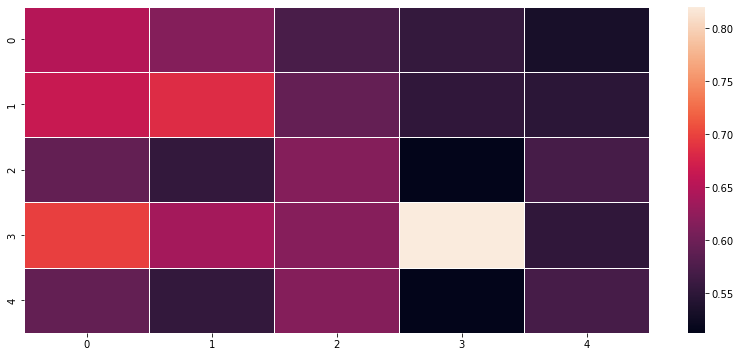

In [22]:
ax = sns.heatmap(data_array, linewidth=0.5)
plt.show()

In [23]:
np.round(data_array,2)

array([[0.65, 0.62, 0.57, 0.55, 0.53],
       [0.66, 0.68, 0.59, 0.55, 0.55],
       [0.59, 0.55, 0.62, 0.51, 0.57],
       [0.7 , 0.64, 0.62, 0.82, 0.55],
       [0.59, 0.55, 0.62, 0.51, 0.57]])

This concludes the exploratory data analysis of the MIT-BIH dataset. Next steps to perform are preprocessing the data: upsampling the data in the classes that have fewer than the maximum number of samples. The data already appears to be normalised since the maximum is at 1 and minimum is at 0. 

Following the pre-processing, an interpretable ML model should be chosen, given that there are already discernible features observed just by looking at the mean of the examples in each class as a simple model. 

The current training set can be split into a training and validation set. The ML model should be trained, and after a suitably low error is achieved, be evaluated on the test data set using some chosen performance metrics.

The model should also be explainable, such that we know what selection of features are likely to give rise to a certain prediction.